In [1]:
import pandas as pd
import email

In [3]:
data_path = '/home/vaishnavi/cs685/data/emails.csv'

In [4]:
df = pd.read_csv(data_path)

In [5]:
cats = df['file'].tolist()

In [6]:
cats = [x.split('/')[0] for x in cats]

In [7]:
len(set(cats))

150

In [8]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

In [9]:
msgs = body(df['message'])

In [10]:
df_final = pd.DataFrame({'emp': cats, 'msg': msgs})

In [11]:
df_final

,emp,msg
0,allen-p,Here is our forecast\n\n
1,allen-p,Traveling to have a business meeting takes the...
2,allen-p,test successful. way to go!!!
3,allen-p,"Randy,\n\n Can you send me a schedule of the s..."
4,allen-p,Let's shoot for Tuesday at 11:45.
...,...,...
517396,zufferli-j,This is a trade with OIL-SPEC-HEDGE-NG (John L...
517397,zufferli-j,Some of my position is with the Alberta Term b...
517398,zufferli-j,2\n\n -----Original Message-----\nFrom: \tDouc...
517399,zufferli-j,Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...


In [12]:
from transformers import GPT2TokenizerFast
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2-large")

In [13]:
df_final['msg'][0]

'Here is our forecast\n\n '

In [ ]:
# def filter_func1(msg):
#     #  crude filtering to remove too small or large sentences
#     length = len(msg.split(' '))
#     return True if length > 150 and length < 1070 else False    
# def filter_func2(msg):
#     length = len(tokenizer(msg)['input_ids'])
#     return True if length > 170 and length < 1023 else False

In [15]:
df_final.shape

(517401, 2)

In [24]:
n = df_final.shape[0]

In [25]:
n

517401

In [26]:
se = [(i, i+1000) for i in range(0, n, 1000)]

In [40]:
import numpy as np

In [100]:
def batch_tokenize(msgs):
    batch_res = tokenizer(msgs)['input_ids']
    batch_len = np.asarray([len(b) for b in batch_res])
    val_idx = np.where((batch_len > 170) & (batch_len < 1023))[0]
    return val_idx, batch_len[val_idx]

In [101]:
# tokenizer(df_final['msg'][:100].tolist())['input_ids']

In [102]:
from tqdm import tqdm

In [103]:
out = []
out_len = []
for s, e in tqdm(se):
    temp = df_final[s:e]
    val_idx, val_lengths = batch_tokenize(temp['msg'].tolist())
    out.append(temp.iloc[val_idx])
    out_len.extend(val_lengths.tolist())

100%|██████████| 518/518 [04:03<00:00,  2.13it/s]


In [104]:
len(out_len)

246332

In [106]:
pd.DataFrame({'lengths': out_len}).to_csv('./processed_lengths.csv')

In [108]:
import matplotlib.pyplot as plt

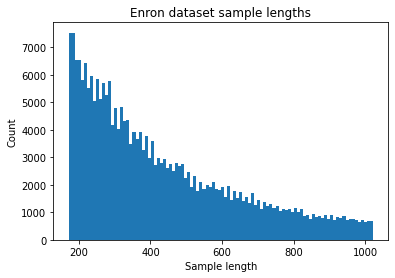

In [117]:
plt.hist(out_len, bins=100)
plt.xlabel('Sample length')
plt.ylabel('Count')
plt.title('Enron dataset sample lengths')
plt.show()
plt.close()

In [64]:
output_df = pd.concat(out, axis=0).reset_index(drop=True)

In [67]:
output_df

,emp,msg
0,allen-p,---------------------- Forwarded by Phillip K ...
1,allen-p,---------------------- Forwarded by Phillip K ...
2,allen-p,---------------------- Forwarded by Phillip K ...
3,allen-p,---------------------- Forwarded by Phillip K ...
4,allen-p,---------------------- Forwarded by Phillip K ...
...,...,...
246327,zufferli-j,"\n\n -----Original Message-----\nFrom: \t""John..."
246328,zufferli-j,I will have 4 books:\n\nCAND-MGMT-BAS for all ...
246329,zufferli-j,"Nicole and everyone, I think the directory is ..."
246330,zufferli-j,"\n\n -----Original Message-----\nFrom: \t""Lern..."


In [72]:
len(output_df['emp'].unique())

150

In [68]:
final = '<' + output_df['emp'] + '>: ' + output_df['msg']

In [69]:
final

0         <allen-p>: ---------------------- Forwarded by...
1         <allen-p>: ---------------------- Forwarded by...
2         <allen-p>: ---------------------- Forwarded by...
3         <allen-p>: ---------------------- Forwarded by...
4         <allen-p>: ---------------------- Forwarded by...
                                ...                        
246327    <zufferli-j>: \n\n -----Original Message-----\...
246328    <zufferli-j>: I will have 4 books:\n\nCAND-MGM...
246329    <zufferli-j>: Nicole and everyone, I think the...
246330    <zufferli-j>: \n\n -----Original Message-----\...
246331    <zufferli-j>: very busy, jess is ok just scare...
Length: 246332, dtype: object

In [87]:
for size in [5000, 20000, 35000, 50000]:
    sampled = final.sample(size)
    sampled.to_csv(f'enron_dataset_{size}.csv', index = False)
    print(size)

5000
20000
35000
50000


In [89]:
output_df.to_csv('./enron_processed.csv')

In [90]:
output_df

,emp,msg
0,allen-p,---------------------- Forwarded by Phillip K ...
1,allen-p,---------------------- Forwarded by Phillip K ...
2,allen-p,---------------------- Forwarded by Phillip K ...
3,allen-p,---------------------- Forwarded by Phillip K ...
4,allen-p,---------------------- Forwarded by Phillip K ...
...,...,...
246327,zufferli-j,"\n\n -----Original Message-----\nFrom: \t""John..."
246328,zufferli-j,I will have 4 books:\n\nCAND-MGMT-BAS for all ...
246329,zufferli-j,"Nicole and everyone, I think the directory is ..."
246330,zufferli-j,"\n\n -----Original Message-----\nFrom: \t""Lern..."
